<a href="https://colab.research.google.com/github/jay062503/portfolio/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training image size: (28, 28) 
Test image size: (28, 28)


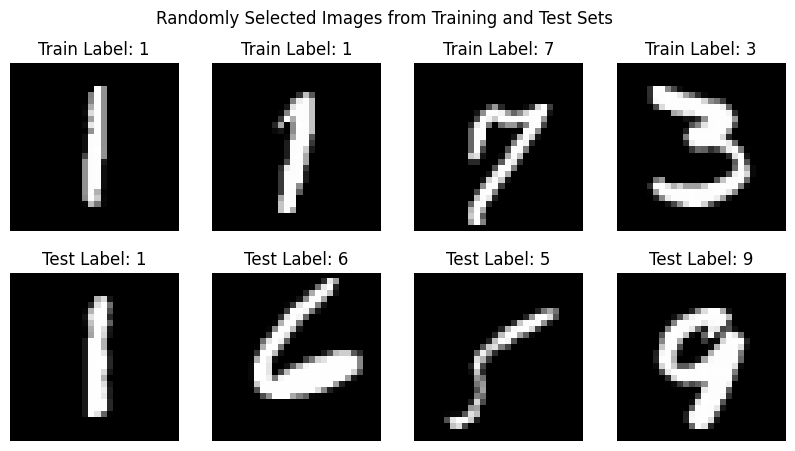

In [3]:
# Q-1) Image Size and Display Random Images

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training image size:", x_train.shape[1:], "\nTest image size:", x_test.shape[1:])

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle("Randomly Selected Images from Training and Test Sets")

train_indices = np.random.choice(len(x_train), 4, replace=False)
test_indices = np.random.choice(len(x_test), 4, replace=False)

for i, idx in enumerate(train_indices):
    axes[0, i].imshow(x_train[idx], cmap='gray')
    axes[0, i].set_title(f"Train Label: {y_train[idx]}")
    axes[0, i].axis("off")

for i, idx in enumerate(test_indices):
    axes[1, i].imshow(x_test[idx], cmap='gray')
    axes[1, i].set_title(f"Test Label: {y_test[idx]}")
    axes[1, i].axis("off")
plt.show()

In [4]:
# Q-2) Count the number of images in training and testing sets

print("Number of training images:", x_train.shape[0])
print("Number of testing images:", x_test.shape[0])

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Number of training images: 60000
Number of testing images: 10000


In [6]:
# Q-3) First Conv2D layer

model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(28, 28, 1), padding='valid'))

In [7]:
# Q-4) Average Pooling layer

model.add(layers.AveragePooling2D(pool_size=(2, 2)))

In [8]:
# Q-5) Second Conv2D layer

model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu'))

In [9]:
# Q-6) Max Pooling layer

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [10]:
# Q-7) 1x1 Convolution layer

model.add(layers.Conv2D(4, (1, 1), activation='relu'))

In [12]:
# Q-8) Flatten and output layer

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 8)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 4)             │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,796 (7.02 KB)

 Trainable params: 1,796 (7.02 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Q-9) Compile and Train the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9273 - loss: 0.3736 - val_accuracy: 0.9306 - val_loss: 0.3426
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9362 - loss: 0.3204 - val_accuracy: 0.9384 - val_loss: 0.2943
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9434 - loss: 0.2806 - val_accuracy: 0.9436 - val_loss: 0.2661
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9444 - loss: 0.2596 - val_accuracy: 0.9446 - val_loss: 0.2485
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9452 - loss: 0.2451 - val_accuracy: 0.9427 - val_loss: 0.2354
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9496 - loss: 0.2219 - val_accuracy: 0.9423 - val_loss: 0.2369
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9523 - loss: 0.2101 - val_accuracy: 0.9448 - val_loss: 0.2170
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9513 - loss: 0.

In [15]:
# Q-10) Evaluate on Test Set

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9141 - loss: 0.4081
Test Accuracy: 0.9218999743461609
